<a href="https://colab.research.google.com/github/SaraEsamMohamed/Data_Analysis/blob/main/exploration_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PISA Data Sets
## by Sara Esam Mohamed

## Preliminary Wrangling
> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [ ]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [ ]:
df = pd.read_csv('pisa2012.csv')
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,...,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1,2,1996,Female,No,6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,Yes,Yes,NaN,NaN,<ISCED level 3A>,No,No,No,No,"Other (e.g. home duties, retired)",<ISCED level 3A>,NaN,NaN,NaN,NaN,Working part-time <for pay>,Country of test,...,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1,2,1996,Female,"Yes, for more than one year",7.0,"No, never","No, never","No, never",One or two times,None,1.0,Yes,Yes,NaN,Yes,NaN,NaN,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,<ISCED level 3A>,No,No,No,No,Working full-time <for pay>,Country of test,...,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,4.5084,4.5315,13.0829,4.5315,4.3313,4.5084,4.5084,13.7954,13.9235,4.3389,13.0829,13.9235,4.3389,4.3313,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1,9,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",Yes,Yes,Yes,No,Working full-time <for pay>,<ISCED level 3A>,Yes,No,Yes,Yes,Working full-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1,8,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",No,No,No,No,Working full-time <for pay>,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1,10,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",One or two times,None,2.0,Yes,Yes,Yes,NaN,NaN,NaN,She did not complete <ISCED level 1>,No,No,No,No,Working part-time <for pay>,"<ISCED level 3B, 3C>",No,No,No,Yes,Working part-time <for pay>,Country of test,...,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,4.2436,4.2436,12.7307,4.2436,4.2436,4.2436,4.2436,12.7307,12.7307,4.2436,12.7307,12.7307,4.2436,4.2436,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13


In [ ]:
df.shape

(15078, 636)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15283 entries, 0 to 15282
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(349), int64(18), object(269)
memory usage: 74.2+ MB


In [ ]:
df.isna().sum()

Unnamed: 0    0
CNT           0
SUBNATIO      0
STRATUM       0
OECD          0
             ..
W_FSTR80      1
WVARSTRR      1
VAR_UNIT      1
SENWGT_STU    1
VER_STU       1
Length: 636, dtype: int64

In [ ]:
df=df[['CNT' ,'ST01Q01' ,  'ST03Q02' ,'ST04Q01' ,'ST11Q01' ,'ST11Q02','PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
         'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE','AGE']]

In [ ]:
#create new field to find the maximam value
df['Max math score'] =df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].max(axis=1)
df['Max read score'] =df[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].max(axis=1)
df['Max science score'] =df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].max(axis=1)


In [ ]:
# create new field to find the average of the value 
df['avg math score'] = (df['PV1MATH']+ df['PV2MATH']+ df['PV3MATH']+ df['PV4MATH']+ df['PV5MATH']) / 5

df['avg read score'] = (df['PV1READ']+ df['PV2READ']+ df ['PV3READ']+ df['PV4READ'] +df['PV5READ']) / 5

df['avg science score'] = (df['PV1SCIE']+ df['PV2SCIE']+ df['PV3SCIE']+ df['PV4SCIE']+ df['PV5SCIE']) / 5

In [ ]:
df.rename(columns = {'CNT':'Country ', 'ST01Q01':'International_Grade' ,'ST03Q02':'Birth_Year','ST04Q01':'Gender',
   'ST11Q01':'Mother_AtHome' , 'ST11Q02' :'Father_AtHome','AGE':'Age' }, inplace=True)

In [ ]:
df.head()

,Country,International_Grade,Birth_Year,Gender,Mother_AtHome,Father_AtHome,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Age,Max math score,Max read score,Max science score,avg math score,avg read score,avg science score
0,Albania,10,1996,Female,Yes,Yes,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,16.17,406.8469,406.8496,408.8400,366.18634,261.01424,371.91348
1,Albania,10,1996,Female,Yes,Yes,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,16.17,486.1427,406.2936,548.9929,470.56396,384.68832,478.12382
2,Albania,9,1996,Female,Yes,Yes,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,15.58,533.2684,431.3938,512.7191,505.53824,405.18154,486.60946
3,Albania,9,1996,Female,Yes,Yes,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,15.67,498.6836,547.3630,481.5740,449.45476,477.46376,453.97240
4,Albania,9,1996,Female,Yes,Yes,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,15.50,418.5309,311.7707,422.1746,385.50398,256.01010,367.15778


### What is the structure of your dataset?

> dataset contains 15078 rows , 636 columns

### What is/are the main feature(s) of interest in your dataset?

> i am interested in Gender feature and show the effects on other

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think age and all Scores

## Univariate Exploration

> 

In [ ]:
base_color =sb.color_palette()[0]

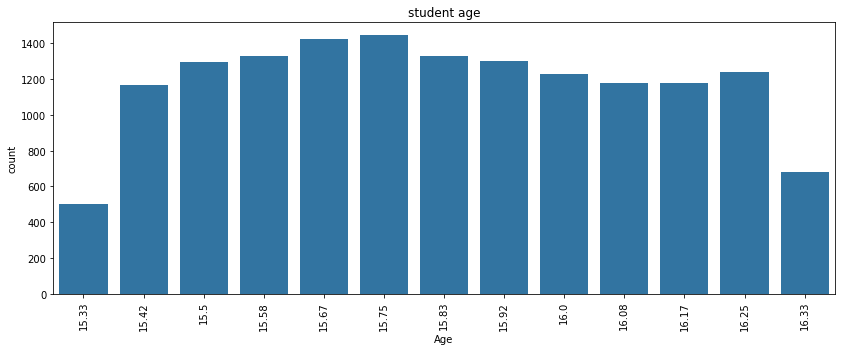

In [ ]:
plt.figure(figsize=[14,5])
sb.countplot(data=df ,x= 'Age' ,color=base_color);
plt.title("student age")
plt.xlabel("Age")
plt.xticks(rotation=90);

**we can have the same information with more view**

Text(0.5, 0, 'Age')

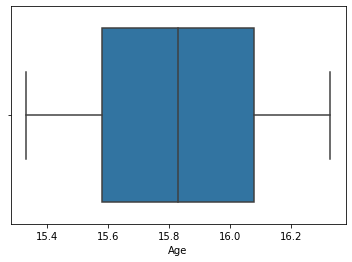

In [ ]:
sb.boxplot(data=df , x= 'Age' ,color=base_color)
plt.xlabel("Age")

 above plot show the most age that have large count & this is showen in another plot that age of 15.75 achived largest value

## Bivariate Exploration



Text(0.5, 1.0, 'maxmum scores by gender')

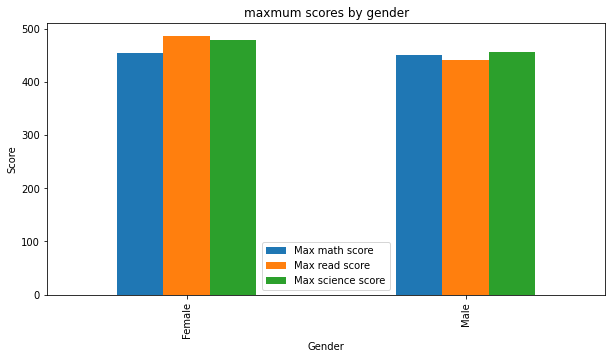

In [ ]:
b =df.groupby(['Gender']).mean()[['Max math score','Max read score','Max science score']]
a = b.plot.bar(figsize=(10,5));
plt.ylabel('Score')
plt.title('maxmum scores by gender')


that show that female achevie high performance in reading & Science but male in math & Science achevie high performance
and we can consider that both good in science

## Multivariate Exploration



Text(0.5, 0.98, 'relation between average scores of Math,Reading & Science')

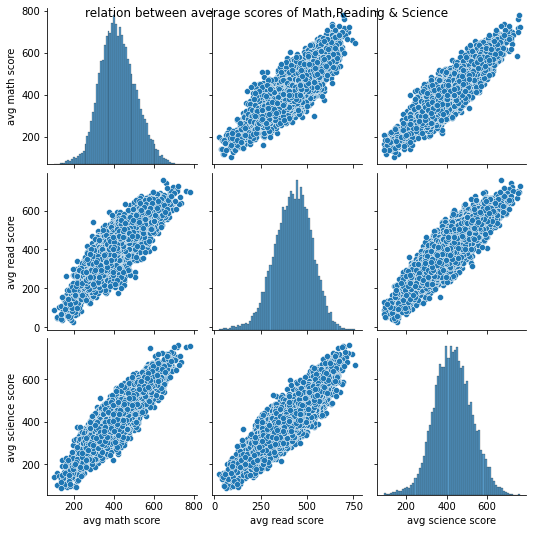

In [ ]:
mul_plot =sb.pairplot(data =df ,vars=["avg math score","avg read score","avg science score"])
mul_plot.fig.suptitle("relation between average scores of Math,Reading & Science")

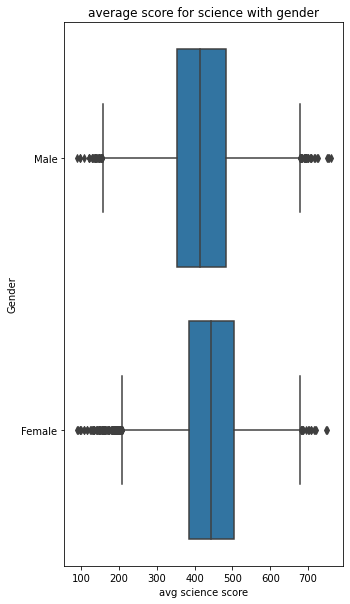

In [ ]:
plt.figure(figsize=[5,10])
df_sort =df.sort_values(by='avg science score')
sb.boxplot(x =df_sort['avg science score'] ,y = df_sort ["Gender"] ,color=sb.color_palette()[0]);
plt.title("average score for science with gender");

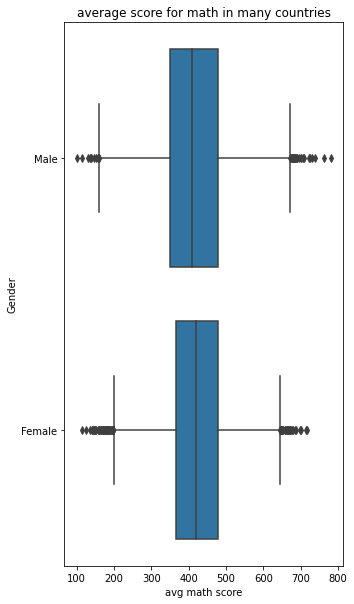

In [ ]:
plt.figure(figsize=[5,10])
df_sort =df.sort_values(by='avg math score')
sb.boxplot(x =df_sort['avg math score'] ,y = df_sort ["Gender"] ,color=sb.color_palette()[0]);
plt.title("average score for math with gender");

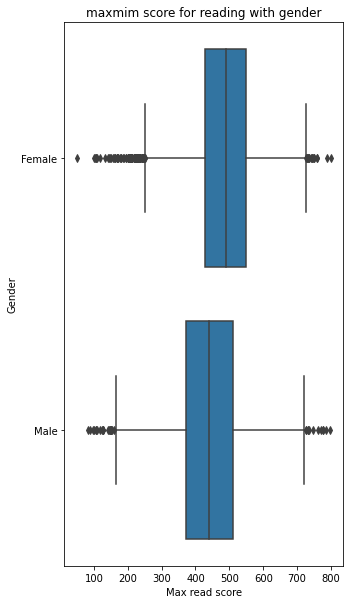

In [ ]:
plt.figure(figsize=[5,10])
df_sort =df.sort_values(by='Max read score')
sb.boxplot(x =df_sort['Max read score'],y = df_sort ['Gender'] ,color=sb.color_palette()[0]);
plt.title("maxmim score for reading with gender");


finally ,observed that 
Math : the maximum value achevied by male
Reading : the maximum value achevied by female 
Science : the maximum value achevied by male
we can consider that male is excellent in scientific material 